# APPLIED DEEP LEARNING FINAL PROJECT
## Machine Learning Solution
### Sandra Marcela Meneses - Diego Fernando López Castillo

Classify a movie genre based on its plot and its poster.

In [60]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,VotingClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

# Read Data

Load Training and Testing data

In [2]:
path = ''

In [30]:
dataTraining = pd.read_csv(os.path.join(path, 'data','dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path,'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [4]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [5]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


# Read gray Images

Load an image from file.

In [6]:
image = io.imread(os.path.join(path, 'images_resize_gray', str(dataTraining.index[0]) + '_resize_gray.jpeg'))

In [7]:
image

array([[ 3,  3,  3, ..., 57, 55, 51],
       [ 3,  3,  3, ..., 99, 98, 95],
       [ 3,  3,  3, ..., 97, 96, 94],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

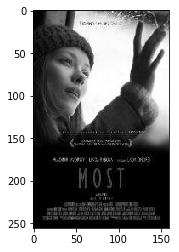

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

#### Read all images

Import training and testing images, into images_training array and images_testing array respectively. With the use of flatten it returns a new array 

In [9]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|██████████| 7895/7895 [00:05<00:00, 1556.22it/s]


In [10]:
images_training = np.stack(images_training)

images_training.shape, dataTraining.shape[0]

((7895, 40960), 7895)

In [11]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

images_testing = np.stack(images_testing)

images_testing.shape, dataTesting.shape[0]

100%|██████████| 3383/3383 [00:02<00:00, 1660.48it/s]


((3383, 40960), 3383)

## Apply PCA

To reduce the dimensionality, we start appling PCA previus to make a model with Machine learning

In [12]:
pca = PCA(n_components=24)
images_training_pca = pca.fit_transform(images_training)

In [13]:
images_testing_pca = pca.transform(images_testing)

### Create predicted variable "y"

In [31]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

Now, we split the data in Train and Test, with a test size = 0.33

In [42]:
X= dataTraining['plot']

In [15]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training_pca, y_genres, test_size=0.33, random_state=42)

In [43]:
Xt_train, Xt_test = train_test_split(X, test_size=0.33, random_state=42)

In [16]:
X_train.shape

(5289, 24)

### Create count vectorizer with ngrams


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')
X_dtm = vect.fit_transform(Xt_train)
X_dtm2 =  vect.transform(Xt_test)
X_dtm.shape

(5289, 1000)

In [45]:
print(vect.get_stop_words())

frozenset({'detail', 'whence', 'amongst', 'keep', 'never', 'thereafter', 'wherein', 'those', 'still', 'whose', 'both', 'even', 'enough', 'per', 'can', 'to', 'give', 'bottom', 'before', 'been', 'an', 'about', 'couldnt', 'noone', 'but', 'onto', 'they', 'also', 'seeming', 'sometimes', 'do', 'their', 'none', 'where', 'will', 'eleven', 'she', 'hasnt', 'throughout', 'our', 'myself', 'fill', 'become', 'amoungst', 'eg', 'he', 'hereby', 'would', 'least', 'except', 'due', 'otherwise', 'therefore', 'already', 'indeed', 'with', 'same', 'than', 'by', 'his', 'else', 'moreover', 'although', 'my', 'put', 'seems', 'thence', 'two', 'your', 'have', 'without', 'above', 'for', 'along', 'con', 'alone', 'then', 'cant', 'hereupon', 'much', 'against', 'cry', 'has', 'are', 'between', 'several', 'beyond', 'always', 'such', 'name', 'be', 'among', 'empty', 'last', 'go', 'why', 'beside', 'fifty', 'a', 'up', 'together', 'whatever', 'only', 'thick', 'hereafter', 'sixty', 'back', 'former', 'get', 'mine', 'sometime', '

In [46]:
print(vect.get_feature_names()[:50])

['abandoned', 'able', 'accepts', 'accident', 'accidentally', 'act', 'action', 'actor', 'actress', 'actually', 'adam', 'adult', 'adventure', 'affair', 'age', 'aged', 'agent', 'agents', 'ago', 'agrees', 'air', 'alan', 'alex', 'alice', 'alien', 'alive', 'america', 'american', 'ancient', 'andrew', 'angeles', 'ann', 'anna', 'annie', 'apart', 'apartment', 'appears', 'area', 'army', 'arrested', 'arrival', 'arrive', 'arrives', 'art', 'artist', 'asks', 'aspiring', 'assigned', 'assistant', 'attack']


## Training multi-class multi-label model (Random Forest Classifier)

### Random Forest Classiffier for Images

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [18]:
estimator_range = range(10, 350, 10)
AUC_scores = []
for estimator in estimator_range:
    clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=estimator, max_depth=10,random_state=42,bootstrap=False,max_features=10))
    clf.fit(X_train, y_train_genres)
    y_pred_genres = clf.predict_proba(X_test)
    AUC_scores.append(roc_auc_score(y_test_genres, y_pred_genres, average='macro'))

Text(0,0.5,'AUC')

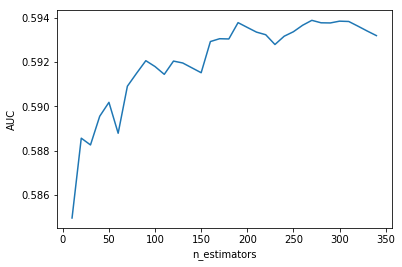

In [19]:
plt.plot(estimator_range, AUC_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC')

In [20]:
np.amax(AUC_scores)

0.5938854120999221

After RandomForest tunning, the number of estimators that maximizes the AUC are 260.

In [21]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=260, max_depth=10,random_state=42,bootstrap=False,max_features=10))

In [22]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=260, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [23]:
y_pred_genres = clf.predict_proba(X_test)

In [24]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5936630172571956

Additionaly, we test a Bagging Classifier model, but the AUC result is lower than the Random Forest Classifier model.

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf3 = OneVsRestClassifier(BaggingClassifier(DecisionTreeClassifier(),n_jobs=-1, n_estimators=10, max_samples=1000, random_state=42,bootstrap=True, oob_score=True))

In [34]:
clf3.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ..., n_estimators=10, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [35]:
y_pred_genres3 = clf3.predict_proba(X_test)

In [36]:
roc_auc_score(y_test_genres, y_pred_genres3, average='macro')

0.5364132191506107

### Random Forest Classiffier for Text

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [47]:
estimator_range2 = range(10, 310, 10)
AUC_scores2 = []
for estimator in estimator_range2:
    clf2 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=estimator, max_depth=10, random_state=42))
    clf2.fit(X_dtm, y_train_genres)
    y_pred_genres2 = clf2.predict_proba(X_dtm2)
    AUC_scores2.append(roc_auc_score(y_test_genres, y_pred_genres2, average='macro')) 

Text(0,0.5,'AUC')

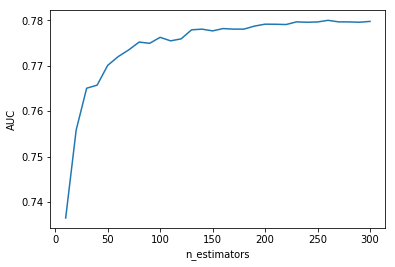

In [48]:
plt.plot(estimator_range2, AUC_scores2)
plt.xlabel('n_estimators')
plt.ylabel('AUC')

After RandomForest tunning, the number of estimators that maximizes the AUC are 260.

In [49]:
np.amax(AUC_scores2)

0.7799839620789383

In [50]:
clf2 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=260, max_depth=10, random_state=42))
clf2

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=260, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [52]:
clf2.fit(X_dtm, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=260, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [53]:
y_pred_genres2 = clf2.predict_proba(X_dtm2)

In [54]:
roc_auc_score(y_test_genres, y_pred_genres2, average='macro')


0.7799839620789383

Additionally, we test a Gradient Boosting Classifier model, but the AUC result is lower than the Random Forest Classifier model.

### Gradient Boosting Classifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
clf4 = OneVsRestClassifier(GradientBoostingClassifier(loss="deviance",n_estimators=800, learning_rate=0.001))

In [106]:
clf4.fit(X_dtm, y_train_genres)
y_predg = clf4.predict_proba(X_dtm2)
y_predg

array([[0.15119782, 0.11585874, 0.02837357, ..., 0.23157003, 0.02926792,
        0.02337867],
       [0.15119782, 0.18062696, 0.02837357, ..., 0.23157003, 0.22886443,
        0.02337867],
       [0.2588863 , 0.11585874, 0.02837357, ..., 0.23157003, 0.02926792,
        0.02337867],
       ...,
       [0.15119782, 0.11585874, 0.02837357, ..., 0.23157003, 0.02926792,
        0.02337867],
       [0.15119782, 0.11585874, 0.02837357, ..., 0.23157003, 0.02926792,
        0.02337867],
       [0.15174276, 0.16185612, 0.03307733, ..., 0.34919124, 0.02926792,
        0.02337867]])

In [107]:
roc_auc_score(y_test_genres, y_predg, average='macro')

0.6880460159488613

### Merge the Images and Text Models

To make the merge of the models is identified how much should weigh the prediction of each model in such a way that the roc_AUC_score is maximized.

In [90]:
AUC_scores_mix=[]
w_range=range(10, 100, 1)
for w in w_range:
    y_pred_mix=(w/100)*y_pred_genres2+y_pred_genres*((100-w)/100)
    AUC_scores_mix.append(roc_auc_score(y_test_genres, y_pred_mix, average='macro'))


Text(0,0.5,'AUC')

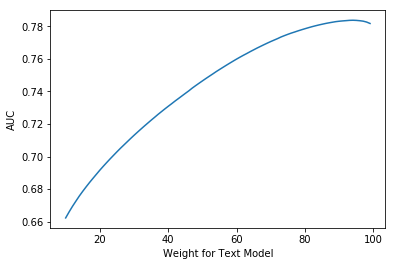

In [91]:
plt.plot(w_range, AUC_scores_mix)
plt.xlabel('Weight for Text Model')
plt.ylabel('AUC')

In [98]:
w=95
y_pred_mix=(w/100)*y_pred_genres2+y_pred_genres*((100-w)/100)
roc_auc_score(y_test_genres, y_pred_mix, average='macro')

0.7836911383500423

# Apply models to test

Export results Random Forest model for images classification

In [100]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(images_testing_pca)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('Final_pred_img_RF.csv', index_label='ID')

Export results Random Forest model for text classification

In [102]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres2 = clf2.predict_proba(vect.transform(dataTesting['plot']))

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('Final_pred_text_RF.csv', index_label='ID')

Export results Random Forest model for mixed model Images+Text. Text model weight=0.95

In [103]:
w=95

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_mix=(w/100)*y_pred_test_genres2+y_pred_test_genres*((100-w)/100)

pd.DataFrame(y_pred_test_mix, index=dataTesting.index, columns=cols).to_csv('Final_pred_RF_MIX.csv', index_label='ID')